In [1]:
%matplotlib inline

import numpy as np
import random as r
import matplotlib.pyplot as plt
from beautifultable import BeautifulTable

# Perceptron

In [2]:
class Perceptron:
    __slots__ = 'bias', 'weights', 'output', 'inputs'
    
    def __init__(self, size):
        self.bias = r.random()
        self.weights = np.random.randn(size)
        self.output = None
        self.inputs = None
        
    def propagation(self, inputs):
        self.output = 1 * ((self.weights.dot(inputs) + self.bias) > 0)
        self.inputs = inputs
        
    def update(self, lr, output):
        error = output - self.output 
        if error:
            self.weights = np.array([w + lr * error * x \
                                    for x, w in np.column_stack((self.inputs, self.weights))])
            self.bias = self.bias + lr * error
            
    def data(self):
        return [self.bias, self.weights, self.inputs, self.output]

In [3]:
table = BeautifulTable()
table.columns.header = ["epoch", "bias", "weights", "inputs", "outputs correct", "outputs"]

In [4]:
def data(epoch, data, output_correct):
    data.insert(0, epoch + 1)
    data.insert(4, output_correct)
    return data

In [5]:
def simulation(epochs, dataset, perceptron, table):
    weights_log = [perceptron.weights]
    bias_log = [perceptron.bias]
    
    for epoch in range(epochs):
        for i in range(len(dataset)):
            perceptron.propagation(dataset[i, 0:3])
            table.rows.append(data(epoch, perceptron.data(), dataset[i, 3]))
            perceptron.update(lr=0.5, output=dataset[i, 3])
        weights_log = np.concatenate((weights_log, [perceptron.weights]), axis=0)
        bias_log.append(perceptron.bias)
            
    return weights_log, bias_log

In [6]:
def plot(log, title):
    plt.plot(log[0][:, 0])
    plt.plot(log[0][:, 1])
    plt.plot(log[0][:, 2])
    plt.plot(log[1])
    plt.title(title)
    plt.xlabel('epochs')
    plt.legend(['Weight 1', 'Weight 2', 'Weight 3', 'Bias'])
    plt.show()

## Caso Conjunción

In [7]:
conjunction = np.array([
    [1,1,1,1],
    [1,1,0,0],
    [1,0,1,0],
    [1,0,0,0],
    [0,1,1,0],
    [0,1,0,0],
    [0,0,1,0],
    [0,0,0,0]
])

p_conjunction = Perceptron(3)

In [8]:
conjunction_log = simulation(30, conjunction, p_conjunction, table)

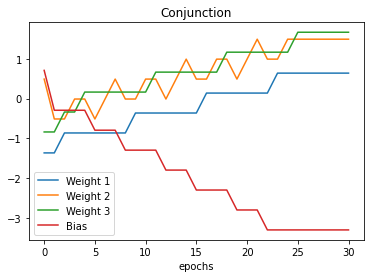

In [9]:
plot(conjunction_log, "Conjunction")

In [10]:
print(table)

+-------+--------+----------------------------+---------+------------+---------+
| epoch |  bias  |          weights           | inputs  | outputs co | outputs |
|       |        |                            |         |   rrect    |         |
+-------+--------+----------------------------+---------+------------+---------+
|   1   | 0.708  | [-1.36162825  0.48896442 - | [1 1 1] |     1      |    0    |
|       |        |        0.83656125]         |         |            |         |
+-------+--------+----------------------------+---------+------------+---------+
|   1   | 1.208  | [-0.86162825  0.98896442 - | [1 1 0] |     0      |    1    |
|       |        |        0.33656125]         |         |            |         |
+-------+--------+----------------------------+---------+------------+---------+
|   1   | 0.708  | [-1.36162825  0.48896442 - | [1 0 1] |     0      |    0    |
|       |        |        0.33656125]         |         |            |         |
+-------+--------+----------

## Caso Disyunción

In [11]:
disjunction = np.array([
    [1,1,1,1],
    [1,1,0,1],
    [1,0,1,1],
    [1,0,0,1],
    [0,1,1,1],
    [0,1,0,1],
    [0,0,1,1],
    [0,0,0,0]
])

p_disjunction = Perceptron(3)

table = BeautifulTable()
table.columns.header = ["epoch", "bias", "weights", "inputs", "outputs correct", "outputs"]

In [12]:
disjunction_log = simulation(30, disjunction, p_disjunction, table)

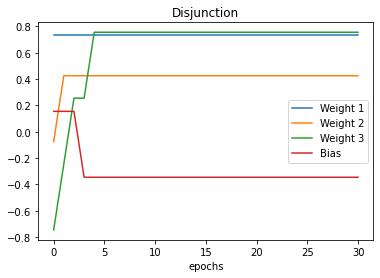

In [13]:
plot(disjunction_log, 'Disjunction')

In [14]:
print(table)

+-------+--------+----------------------------+---------+------------+---------+
| epoch |  bias  |          weights           | inputs  | outputs co | outputs |
|       |        |                            |         |   rrect    |         |
+-------+--------+----------------------------+---------+------------+---------+
|   1   | 0.155  | [ 0.73750918 -0.07488963 - | [1 1 1] |     1      |    1    |
|       |        |        0.74489013]         |         |            |         |
+-------+--------+----------------------------+---------+------------+---------+
|   1   | 0.155  | [ 0.73750918 -0.07488963 - | [1 1 0] |     1      |    1    |
|       |        |        0.74489013]         |         |            |         |
+-------+--------+----------------------------+---------+------------+---------+
|   1   | 0.155  | [ 0.73750918 -0.07488963 - | [1 0 1] |     1      |    1    |
|       |        |        0.74489013]         |         |            |         |
+-------+--------+----------

## Bicondicionalidad

In [15]:
biconditionality = np.array([
    [1,1,1,1],
    [1,1,0,0],
    [1,0,1,0],
    [1,0,0,0],
    [0,1,1,0],
    [0,1,0,0],
    [0,0,1,0],
    [0,0,0,1]
])

p_biconditionality = Perceptron(3)

table = BeautifulTable()
table.columns.header = ["epoch", "bias", "weights", "inputs", "outputs correct", "outputs"]

In [16]:
simulation(100, biconditionality, p_biconditionality, table)

(array([[-0.00841623,  0.53778232, -0.12054131],
        [-0.50841623,  0.03778232, -0.12054131],
        [-0.50841623, -0.46221768, -0.12054131],
        [-0.50841623, -0.96221768, -0.12054131],
        [-0.50841623, -0.96221768, -0.12054131],
        [-0.50841623, -0.96221768, -0.12054131],
        [-0.50841623, -0.96221768, -0.12054131],
        [-0.50841623, -0.96221768, -0.12054131],
        [-0.50841623, -0.96221768, -0.12054131],
        [-0.50841623, -0.96221768, -0.12054131],
        [-0.50841623, -0.96221768, -0.12054131],
        [-0.50841623, -0.96221768, -0.12054131],
        [-0.50841623, -0.96221768, -0.12054131],
        [-0.50841623, -0.96221768, -0.12054131],
        [-0.50841623, -0.96221768, -0.12054131],
        [-0.50841623, -0.96221768, -0.12054131],
        [-0.50841623, -0.96221768, -0.12054131],
        [-0.50841623, -0.96221768, -0.12054131],
        [-0.50841623, -0.96221768, -0.12054131],
        [-0.50841623, -0.96221768, -0.12054131],
        [-0.50841623

In [17]:
print(table)

+-------+--------+----------------------------+---------+------------+---------+
| epoch |  bias  |          weights           | inputs  | outputs co | outputs |
|       |        |                            |         |   rrect    |         |
+-------+--------+----------------------------+---------+------------+---------+
|   1   | 0.091  | [-0.00841623  0.53778232 - | [1 1 1] |     1      |    1    |
|       |        |        0.12054131]         |         |            |         |
+-------+--------+----------------------------+---------+------------+---------+
|   1   | 0.091  | [-0.00841623  0.53778232 - | [1 1 0] |     0      |    1    |
|       |        |        0.12054131]         |         |            |         |
+-------+--------+----------------------------+---------+------------+---------+
|   1   | -0.409 | [-0.50841623  0.03778232 - | [1 0 1] |     0      |    0    |
|       |        |        0.12054131]         |         |            |         |
+-------+--------+----------

## Condicionalidad

In [18]:
conditionality = np.array([
    [1,1,1,1],
    [1,1,0,0],
    [1,0,1,1],
    [1,0,0,1],
    [0,1,1,1],
    [0,1,0,1],
    [0,0,1,1],
    [0,0,0,1]
])

p_conditionality = Perceptron(3)

table = BeautifulTable()
table.columns.header = ["epoch", "bias", "weights", "inputs", "outputs correct", "outputs"]

In [19]:
simulation(30, conditionality, p_conditionality, table)

(array([[ 2.793767  ,  0.73112059,  0.10416777],
        [ 2.293767  ,  0.23112059,  0.10416777],
        [ 1.793767  ,  0.23112059,  0.60416777],
        [ 1.293767  ,  0.23112059,  1.10416777],
        [ 0.793767  ,  0.23112059,  1.10416777],
        [ 0.793767  ,  0.23112059,  1.10416777],
        [ 0.293767  ,  0.23112059,  1.10416777],
        [ 0.293767  , -0.26887941,  1.10416777],
        [ 0.293767  , -0.26887941,  1.10416777],
        [-0.206233  , -0.26887941,  1.10416777],
        [-0.206233  , -0.76887941,  1.10416777],
        [-0.206233  , -0.76887941,  1.10416777],
        [-0.706233  , -0.76887941,  1.10416777],
        [-0.706233  , -1.26887941,  1.10416777],
        [-0.706233  , -1.26887941,  1.10416777],
        [-0.706233  , -1.26887941,  1.10416777],
        [-0.706233  , -1.26887941,  1.10416777],
        [-0.706233  , -1.26887941,  1.10416777],
        [-0.706233  , -1.26887941,  1.10416777],
        [-0.706233  , -1.26887941,  1.10416777],
        [-0.706233  

In [20]:
print(table)

+-------+--------+----------------------------+---------+------------+---------+
| epoch |  bias  |          weights           | inputs  | outputs co | outputs |
|       |        |                            |         |   rrect    |         |
+-------+--------+----------------------------+---------+------------+---------+
|   1   | 0.652  | [2.793767   0.73112059 0.1 | [1 1 1] |     1      |    1    |
|       |        |          0416777]          |         |            |         |
+-------+--------+----------------------------+---------+------------+---------+
|   1   | 0.652  | [2.793767   0.73112059 0.1 | [1 1 0] |     0      |    1    |
|       |        |          0416777]          |         |            |         |
+-------+--------+----------------------------+---------+------------+---------+
|   1   | 0.152  | [2.293767   0.23112059 0.1 | [1 0 1] |     1      |    1    |
|       |        |          0416777]          |         |            |         |
+-------+--------+----------